In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv")
df

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [3]:
df=df.groupby('Date', sort = False).sum()
df.head()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,,
30/01/20,1,1,0,0,0
31/01/20,2,1,0,0,0
01/02/20,3,2,0,0,0
02/02/20,4,3,0,0,0
03/02/20,5,3,0,0,0


In [4]:
#droping the coloumn Sno
df = df.drop('Sno', axis =1)
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [5]:
#Creating new column "Total cases"
df["Total cases"]=df.sum(axis=1).astype("int")
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3


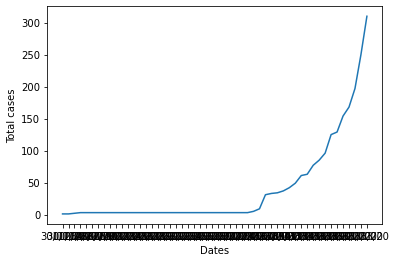

In [11]:
#Visualizing the data
plt.plot(df["Total cases"])
plt.xlabel("Dates")
plt.ylabel("Total cases")
plt.show()

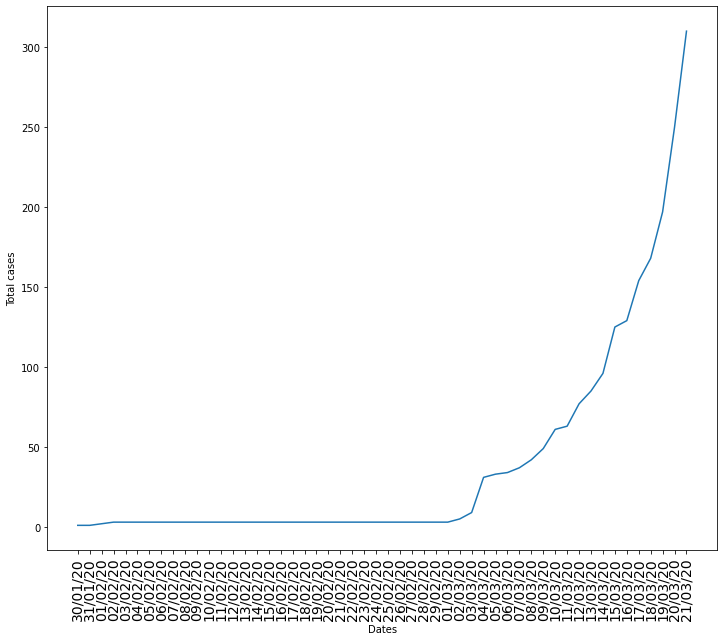

In [12]:
plt.figure(figsize=(12,10))
plt.plot(df["Total cases"])
plt.xlabel("Dates")
plt.ylabel("Total cases")
plt.xticks(rotation=90, fontsize=14)
plt.show()

We can clearly see above that we have an exponential trend in the no. of total cases.

In [15]:
#modelling the solution
rate_list = []
for i in range(0, df.shape[0]-1):
    
    rate=(df.iloc[i+1]["Total cases"] - df.iloc[i]["Total cases"])/df.iloc[i]["Total cases"]
    rate_list.append(rate)

In [16]:
#avg of the rate_list
avg_rate=np.average(rate_list)
avg_rate

0.15548289717820452

In [17]:
# P_t = p_o*(e^(r*t))
# t is the time period in days, r is the rate of increase
#P_t and P_o are the predicted forecast and the inital values respectively.
P_o =31
t=26
p_t= round(P_o*(math.exp(avg_rate *t)),2)
p_t

1766.12